# Exercise 2: Our first classifier.


## I. GOAL OF THE EXERCISE

In this exercise you will practice the basic pipeline of the supervised learning task. Implement a simple classifier. And will try to solve several hinderances found in the process.

## II. DELIVERABLES
As you progress in this exercise, you will find several questions you are expected to answer them properly with adequate figures when required and deliver the notebook with the working code used for generating and discussing the results in due time.


<div class = "alert alert-danger" style="border-radius:10px"> **IMPORTANT:** Write in the next cell the name of the people that answer this notebook
</div>

## Felix Altenberger, Pablo Reynoso, Emanuel Sanchez

## III. OUR FIST CLASSIFIER.
We are given the data in diabetes.mat and our goal is to predict the whether a person suffers from diabetes or not given her medical record. Our first model to try is linear regression as explained in ”A gentle introduction to supervised learning”.

### A. Understanding and preprocessing our problem.
The first step in the learning pipeline is to have a general picture of your dataset particularities.

### B. Data set analysis
Load the dataset and describe the basic properties of the data,

<div class = "alert alert-success" style = "border-radius:10px">**QUESTION BLOCK 1:**
<ol>
<li> Which is the cardinality (number of examples) of the training set?</li> 
<li> Which is the dimensionality of the training set? </li>
<li> Which is the mean value of the training set? </li>
</ol>
<div>

In [48]:
import scipy.io as sio
data = sio.loadmat('diabetes.mat')

X = data['x'].T
y = data['y']
#1.
#print X.shape[0]
#2.
#print X.shape[1]
#3.
#print sum(X)/len(X)

1. The cardinality is 768.
2. The dimensionality is 8.
3. The mean values are [nan, nan, nan, nan, nan, nan, 0.4718763, 33.24088542]


As you can see there are some missing values with value NaN and som
e categorical data.

<div class = "alert alert-success" style = "border-radius:10px">**QUESTION BLOCK 2:**
<ol>
<li> Create a new dataset D1, replacing the NaN values with the mean value of the corresponding attribute without considering the missing values. </li>
<li> Create a new dataset D2, replacing the NaN values with the mean value of the corresponding attribute without considering the missing values conditioned to the class they belong, i.e. replace the missing attribute values of class +1 with the mean of that attribute of the examples of class +1, and the same for the other class. </li>
<li> **[Optional :]** Explain another method to deal with missing values and apply it to preprocess the training data. Include the reference of the method used. Consider this new dataset as D3. </li>
<li> Which are the new mean values of each dataset?</li>
</ol>
</div>

In [50]:
import math
import copy
%matplotlib inline
import matplotlib.pyplot as plt

#1. + 2.
#declare vars
means, ncount, means_classed, ncount_classed = [0]*8, [0]*8, [0]*8, [0]*8
for i in range(8):
    means_classed[i], ncount_classed[i] = [0,0],[0,0]
    
#calculate means
for i in range(len(X)):
    for j in range(len(X[0])):
        if not math.isnan(X[i][j]):
            means[j]+=X[i][j]
            ncount[j]+=1
            if y[i]==-1:
                means_classed[j][0]+=X[i][j]
                ncount_classed[j][0]+=1
            elif y[i]==1:
                means_classed[j][1]+=X[i][j]
                ncount_classed[j][1]+=1
for i in range(8):
    means[i] = means[i]/ncount[i]
    for j in range(2):
         means_classed[i][j] = means_classed[i][j]/ncount_classed[i][j]
  
#create d1, d2
d1,d2 = copy.deepcopy(X),copy.deepcopy(X)
for i in range(len(X)):
    for j in range(len(X[0])):
        if math.isnan(X[i][j]):
            d1[i][j] = means[j]
            if y[i]==-1:
                d2[i][j] = means_classed[j][0]
            elif y[i]==1:
                d2[i][j] = means_classed[j][1]
#4.
#print sum(d1)/len(d1)
#print sum(d2)/len(d2)

#just some code used for visualization. This is not needed for the assignment though
#x0 = [row[0] for row in X]
#plt.scatter(x0,y)

The mean values of d1 are:
[4.49467275, 121.68676278, 72.40518417, 29.15341959, 155.54822335, 32.45746367, 0.4718763, 33.24088542]
and the mean values of d2 are:
[4.49265212, 121.69735767, 72.42814101, 29.24704236, 157.00352686, 32.44642005, 0.4718763, 33.24088542]

### C. A simple classifier

Our first classifier is a thresholded regressor. Use and/or modify any of the methods you implemented for regression and apply it to find a linear classifier.

<div class = "alert alert-success" style = "border-radius:10px">**QUESTION BLOCK 3:**
<ol>
<li>In this model you have to learn the threshold value. Explain how you can accommodate this parameter.</li>
<li>Report the normal vector of the separating hyperplane for each data set D1, D2, D3.</li>
<li>Compute the error rates achieved on the training data. Are there significant differences? Report the method used and their parameters.</li>
</ol>
<div>

In [52]:
# your code
import numpy as np

def ana_sol(x,y):
    x_pinv = np.linalg.pinv(x)
    w = np.dot(x_pinv, y)
    return w

def classify(w,x):
    x_til = [1]*(len(x)+1)
    x_til[1:] = x
    return np.sign(np.dot(np.transpose(x_til),w))

mat1 = np.array([[1]]*len(d1))
x_til1, x_til2 = np.concatenate((mat1, d1), axis=1), np.concatenate((mat1, d2), axis=1)
w1, w2 = ana_sol(x_til1,y), ana_sol(x_til2, y)
#1.
trs1, trs2 = -w1[0][0],-w2[0][0]
#2.
n1, n2 = w1[1:], w2[1:]
#print n1,n2
#3.
j1, j2 = 0,0
for i in range(len(y)):
    if y[i] != classify(w1,d1[i]):
        j1+=1
    if y[i] != classify(w1,d2[i]):
        j2+=1
err1 = j1*1.0/len(y)
err2 = j2*1.0/len(y)
#print err1, err2


1. The threshold is learned by performing linear regression (using the analytical solution). -w[0] of the resulting vector w is the threshold that we are looking for.
2. The normal vector of D1 is: [0.0454830899, 0.0128752133, -0.00276153057, 0.000309178172, -0.000175410884, 0.0273791130, 0.250953772, 0.00498452234] and the one of D2 is:
[0.0556913, 0.00988663, -0.00151083, 0.01041739, 0.00186537, 0.0160551, 0.22947897, 0.00183327]
3. The error rate on D1 is 0.22135 and the one on D2 is 0.21875. As expected, the error rate on D2 is lower, but surprisingly only by 0.00260, which is a very small amount.


Training error is a poor estimation of the generalization error. Let us test what happens in a test set created by holding-out a certain percentage of the original dataset.

<div class = "alert alert-success" style = "border-radius:10px">**QUESTION BLOCK 4:**

Repeat the learning process in block 3 using just D2 but holding-out the last fifth of the data set for testing purposes, i.e. use the first 4/5-th for training and the last 1/5-th for testing. Follow exactly the following steps in your process:
<ol>
<li> Clear your workspace: `%reset -f` at the begining of the cell. </li>
<li> Preprocess the data replacing the NaN using the method for creating D2.</li>
<li> Split your data in two sets: the first 4/5-th is to be used for training and
the last 1/5-th will be used for testing purposes. Use a random seed value equal to 42.</li>
<li> Train your model on the training set.</li>
<li> Answer the following questions: Which is the error rate on your training
data? Which is the error rate on your test data? Are they similar? Did you expect that behavior? Why?</li>
</ol>
</div>

In [53]:
#1.
%reset -f

#2. 
import scipy.io as sio
import math
import copy
import numpy as np
import random as rd

data = sio.loadmat('diabetes.mat')
X = data['x'].T
y = data['y']
n = len(X)

#declare vars
means_classed, ncount_classed = [0]*8, [0]*8
for i in range(8):
    means_classed[i], ncount_classed[i] = [0,0],[0,0]
    
#calculate means
for i in range(n):
    for j in range(len(X[0])):
        if not math.isnan(X[i][j]):
            if y[i]==-1:
                means_classed[j][0]+=X[i][j]
                ncount_classed[j][0]+=1
            elif y[i]==1:
                means_classed[j][1]+=X[i][j]
                ncount_classed[j][1]+=1
for i in range(8):
    for j in range(2):
         means_classed[i][j] = means_classed[i][j]/ncount_classed[i][j]
            
#update values
for i in range(n):
    for j in range(len(X[0])):
        if math.isnan(X[i][j]):
            if y[i]==-1:
                X[i][j] = means_classed[j][0]
            elif y[i]==1:
                X[i][j] = means_classed[j][1]

#3. - randomly split data into test and training set
split = int(round(n*0.8))
X_train, X_test, y_train, y_test = [0]*split, [0]*(n-split), [0]*split, [0]*(n-split)
rd.seed(42)
split_count = 0
used = [False]*n
while split_count < split:
    rand_val = rd.randint(0,n-1)
    if not used[rand_val]:
        used[rand_val] = True
        X_train[split_count], y_train[split_count] = X[rand_val], y[rand_val]
        split_count+=1
split_count = 0
for i in range(n):
    if not used[i]:
        X_test[split_count], y_test[split_count] = X[i], y[i]
        split_count += 1
        
#4.
def ana_sol(x,y):
    x_pinv = np.linalg.pinv(x)
    w = np.dot(x_pinv, y)
    return w

def classify(w,x):
    x_til = [1]*(len(x)+1)
    x_til[1:] = x
    return np.sign(np.dot(np.transpose(x_til),w))

mat1 = np.array([[1]]*len(X_train))
X_til= np.concatenate((mat1, X_train), axis=1)
w = ana_sol(X_til,y_train)

#5.
j_train, j_test = 0,0
for i in range(len(y_train)):
    if y_train[i] != classify(w,X_train[i]):
        j_train+=1
for i in range(len(y_test)):
    if y_test[i] != classify(w,X_test[i]):
        j_test+=1
err_train, err_test = j_train*1.0/len(y_train), j_test*1.0/len(y_test)
#print err_train, err_test

The error on the training set is 0.197068403909 and the one on the test set is 0.188311688312. The errors are very similar (the difference is only 0.00875671559711 (= ~4,7% decrease)). It is not surprising that the error rates are close together, since the complexity of the classifier is very low. According to Hoeffding's inequality, the out-of-sample-error should therefore be close to the in-sample-error, which is exactly what we observe. However we would have expected that the test error is higher than the training error, which is not the case. The reason for this should again be that the complexity of the classifier is very low, for which reason it is underfitting the training set.

<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOCK 5:**
Repeat the process in block 4 changing the order of some of the steps. Follow exactly the following steps in your process:
<ol>
<li> Clear your workspace with `%reset -f`.</li>
<li> Split your data in two sets: the first 4/5-th is to be used for training and the last 1/5-th will be used for testing purposes. Use random state or random seed value of 42. </li>
<li> Preprocess the data replacing the NaN using the method for creating D2. But this time use only the data corresponding to the training set. </li>
<li> Train your model on the training set.</li>
<li> Replace the NaN values using the means computed on the training data. </li>
<li> Answer the following questions: Which is the error rate on your training data? Which is the error rate on your test data? Are they similar? Did you expect that behavior? Why? </li>
<li> Compare these results with the ones in block 4. Do we achieve better or worse results? Why?</li>
<div>

In [54]:
#1.
%reset -f

#2.-7.
import scipy.io as sio
import math
import copy
import numpy as np
import random as rd

data = sio.loadmat('diabetes.mat')
X = data['x'].T
y = data['y']
n = len(X)

def ana_sol(x,y):
    x_pinv = np.linalg.pinv(x)
    w = np.dot(x_pinv, y)
    return w

def classify(w,x):
    x_til = [1]*(n+1)
    x_til[1:] = x
    return np.sign(np.dot(np.transpose(x_til),w))

def calc_errs(split_perc):
    #2
    split = int(round(n*(split_perc/100.0)))
    X_train, X_test, y_train, y_test = [0]*split, [0]*(n-split), [0]*split, [0]*(n-split)
    rd.seed(42)
    split_count = 0
    used = [False]*n
    while split_count < split:
        rand_val = rd.randint(0,n-1)
        if not used[rand_val]:
            used[rand_val] = True
            X_train[split_count], y_train[split_count] = X[rand_val], y[rand_val]
            split_count+=1
    split_count = 0
    for i in range(n):
        if not used[i]:
            X_test[split_count], y_test[split_count] = X[i], y[i]
            split_count += 1

    #3. & 5. - we change the order of 4. and 5., because they do not interfer and it is much easier to do 3. and 5. together
    #declare vars
    means_classed, ncount_classed = [0]*8, [0]*8
    for i in range(8):
        means_classed[i], ncount_classed[i] = [0,0],[0,0]

    #calculate means
    for i in range(len(X_train)):
        for j in range(len(X_train[0])):
            if not math.isnan(X_train[i][j]):
                if y[i]==-1:
                    means_classed[j][0]+=X_train[i][j]
                    ncount_classed[j][0]+=1
                elif y[i]==1:
                    means_classed[j][1]+=X_train[i][j]
                    ncount_classed[j][1]+=1
    for i in range(8):
        for j in range(2):
            if ncount_classed[i][j] != 0:
                means_classed[i][j] = means_classed[i][j]/ncount_classed[i][j]

    #update values
    for i in range(n):
        for j in range(len(X[0])):
            if math.isnan(X[i][j]):
                if y[i]==-1:
                    X[i][j] = means_classed[j][0]
                elif y[i]==1:
                    X[i][j] = means_classed[j][1]

    #4.
    if len(X_train) > 0:
        mat1 = np.array([[1]]*len(X_train))
        X_til= np.concatenate((mat1, X_train), axis=1)
        w = ana_sol(X_til,y_train)
    else:
        w = [1]*9

    #6.
    j_train, j_test = 0,0
    for i in range(len(y_train)):
        if y_train[i] != classify(w,X_train[i]):
            j_train+=1
    for i in range(len(y_test)):
        if y_test[i] != classify(w,X_test[i]):
            j_test+=1
    err_train, err_test = 0,0
    if len(y_train)>0: 
        err_train = j_train*1.0/len(y_train)
    if len(y_test)>0:
        err_test = j_test*1.0/len(y_test)
    return err_train, err_test

#print calc_errs(80)

The error rate on the training set is 0.23289902280130292 and the one on the test set is 0.2012987012987013. They are now a bit further apart and the test error is again lower than the training error, which we did not expect for similar reasons as explained in the previous exercise. In comparison to the previous exercise, the results are alot worse, since all errors (in-sample, out-of-sample, generalization) increased. We expected this behaviour, because we used less data for the prediction of the NaN values, for which reason the quality of the data should be worse.

<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOCK 6:**
<ol>
<li> Repeat the process in block 5 changing the percentage of the data for training and testing. Plot a graph with the training and test error rates for each splitting percentage point. Comment the results.</li>
<li> Add to the plot the upper bound on the generalization error using the equation of the slides for VC dimension equal to $d + 1$. Discuss the result.</li>
<li> How many samples does the bound predict in order to have 1% error deviation with a confidence of 95%? And with confidence 50%? What about 5% and 10% error deviation with 95% confidence? Comment the behavior according to your observations.</li>
</ol>
<div>

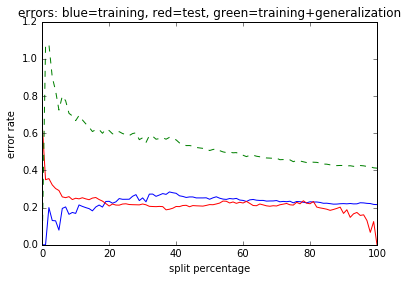

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

def vcdim(n, d, delta):
    mue = 1-delta
    try: 
        return math.sqrt((d*(math.log(2*n/d)+1)+math.log(2.0/delta))/(2*n))
        #return = math.sqrt((1.0/n)*(d*(math.log(2*n/d)+1)-math.log(mue/4.0)))
    except (ValueError, ZeroDivisionError):
        return 0
        #return vcdim(n,d,delta+0.01)

err_train, err_test = [0]*101, [0]*101
x_plot = range(101)
for i in x_plot:
    err_train[i], err_test[i] = calc_errs(i)
    
#1.
plt.title('errors: blue=training, red=test, green=training+generalization')
plt.xlabel('split percentage')
plt.ylabel('error rate')
plt.plot(x_plot, err_train, 'b')
plt.hold('on')
plt.plot(x_plot, err_test, 'r')
#2.
plt.hold('on')
err_gen = [0]*101
for i in x_plot:
    err_gen[i] = vcdim(i*0.01*n, 9, 0.05)
    
err_trgen = [0]*101
for i in x_plot:
    err_trgen[i] = err_train[i] + err_gen[i]
plt.plot(x_plot, err_trgen, 'g--')
plt.show()


1.  The curves of both error rates have the form that we expected, but it is interesting that the training error is greater than the test error for splits over 20%. This means that the generalization error is becoming very low very quickly. The reason for this should, again, be the low complexity of the classifier.
2. As it seems the curve of the generalization upper bound is almost parallel to the curve of the test error, but it is a lot higher overall, for which reason it is not very helpful for predicting the actual error rate.
3. According to WolframAlpha, the amount of samples needed would be: 739229 for 1% error deviation with 95% confidence, 726963 for 1% error deviation with 50% confidence, 22711 for 5% error deviation with 95% confidence and 4996 for 10% error deviation with 95% confidence.